In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [2]:
selected_cell = 'alpha-beta_T_Cells'

In [3]:
estimation = pd.read_csv('GSE14520.Immune.csv',index_col=0)
estimation.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,
GSM362947,0.850503,0.000000,0.002656,0.000000,0.0,0.0,0.000000,0.146841,0,0.771577,0.639033
GSM362948,0.812912,0.002640,0.023056,0.000418,0.0,0.0,0.005214,0.155760,0,0.798375,0.603413
GSM362949,0.804680,0.000000,0.069858,0.003027,0.0,0.0,0.000000,0.122435,0,0.786187,0.619179
GSM362950,0.812865,0.009277,0.032082,0.000000,0.0,0.0,0.016055,0.129721,0,0.843285,0.542035
GSM362951,0.968028,0.000691,0.011618,0.000000,0.0,0.0,0.004225,0.015438,0,0.866095,0.505705


In [4]:
survival_data = pd.read_csv('GSE14520.Survival.csv',index_col=0)
survival_data.head()

,OS_E,OS,DFS_E,DFS
GSM,,,,
GSM363205,0,58.0,0,58.0
GSM363115,0,66.6,0,66.6
GSM362970,0,67.3,0,67.3
GSM363354,1,10.4,1,10.4
GSM363039,0,52.8,0,52.8


In [5]:
dfs_data = survival_data.filter(['DFS_E', 'DFS'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFS_E']]
dfs_data['DFS_T'] = [time for time in dfs_data['DFS']]
dfs_data.head()

,DFS_E,DFS,DFS_T
GSM,,,
GSM363205,False,58.0,58.0
GSM363115,False,66.6,66.6
GSM362970,False,67.3,67.3
GSM363354,True,10.4,10.4
GSM363039,False,52.8,52.8


In [6]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,DFS_E,DFS,DFS_T
GSM362947,0.850503,0.000000,0.002656,0.000000,0.0,0.0,0.000000,0.146841,0,0.771577,0.639033,True,50.0,50.0
GSM362948,0.812912,0.002640,0.023056,0.000418,0.0,0.0,0.005214,0.155760,0,0.798375,0.603413,True,8.8,8.8
GSM362949,0.804680,0.000000,0.069858,0.003027,0.0,0.0,0.000000,0.122435,0,0.786187,0.619179,True,18.2,18.2
GSM362950,0.812865,0.009277,0.032082,0.000000,0.0,0.0,0.016055,0.129721,0,0.843285,0.542035,True,30.1,30.1
GSM362952,0.928108,0.000000,0.000000,0.000000,0.0,0.0,0.004703,0.067189,0,0.818214,0.580638,False,54.3,54.3


In [7]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,DFS_E,DFS,DFS_T
GSM363054,0.323434,0.151098,0.326172,0.013003,0.0,0.075880,0.000000,0.110413,0,-0.003469,1.127505,False,53.8,53.8
GSM363388,0.356973,0.087459,0.228157,0.000000,0.0,0.088836,0.003773,0.234803,0,0.315625,0.964051,True,11.6,11.6
GSM363271,0.323623,0.091756,0.190918,0.016761,0.0,0.127155,0.049899,0.199888,0,0.427802,0.904950,False,28.7,28.7
GSM363393,0.597644,0.016488,0.182488,0.004456,0.0,0.000000,0.011819,0.187105,0,0.063313,1.137226,True,4.0,4.0
GSM363438,0.704765,0.000000,0.148456,0.000000,0.0,0.000000,0.026016,0.120764,0,0.801557,0.609606,False,56.6,56.6


In [8]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [13]:
#optimization = optimization.dropna()
#optimization = optimization.sort_values('Log Rank Test')
#optimization = int(optimization.iloc[0].name)
optimization = int(len(E)/2)

In [14]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.00198440723248278

In [15]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.11293

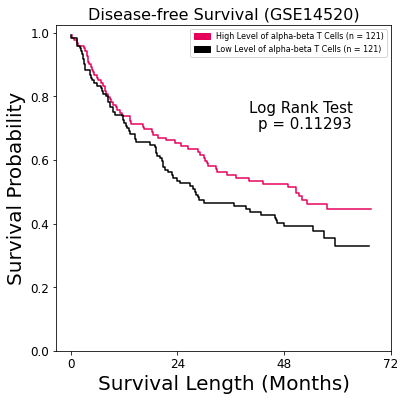

In [16]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,73,24),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of alpha-beta T Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of alpha-beta T Cells (n = %s)'%len(E_low))
plt.text(40,0.75, 'Log Rank Test',fontsize=15)
plt.text(42,0.7, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=8)
plt.title('Disease-free Survival (GSE14520)',fontsize=16)
plt.savefig('GSE14520.%s.DFS.pdf'%selected_cell,format='pdf')

In [17]:
os_data = survival_data.filter(['OS_E', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS_E']]
os_data['OS_T'] = [time for time in os_data['OS']]
os_data.head()

,OS_E,OS,OS_T
GSM,,,
GSM363205,False,58.0,58.0
GSM363115,False,66.6,66.6
GSM362970,False,67.3,67.3
GSM363354,True,10.4,10.4
GSM363039,False,52.8,52.8


In [18]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,OS_E,OS,OS_T
GSM362947,0.850503,0.000000,0.002656,0.000000,0.0,0.0,0.000000,0.146841,0,0.771577,0.639033,True,59.2,59.2
GSM362948,0.812912,0.002640,0.023056,0.000418,0.0,0.0,0.005214,0.155760,0,0.798375,0.603413,False,61.4,61.4
GSM362949,0.804680,0.000000,0.069858,0.003027,0.0,0.0,0.000000,0.122435,0,0.786187,0.619179,True,18.2,18.2
GSM362950,0.812865,0.009277,0.032082,0.000000,0.0,0.0,0.016055,0.129721,0,0.843285,0.542035,False,57.5,57.5
GSM362952,0.928108,0.000000,0.000000,0.000000,0.0,0.0,0.004703,0.067189,0,0.818214,0.580638,False,54.3,54.3


In [19]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Non-inflammatory_Macrophage,alpha-beta_T_Cells,Inflammatory_Macrophage,NK-like_Cells,gamma-delta_T_Cells,Mature_B_Cells,Plasma_Cells,P-value,Correlation,RMSE,OS_E,OS,OS_T
GSM363054,0.323434,0.151098,0.326172,0.013003,0.000000,0.075880,0.000000,0.110413,0,-0.003469,1.127505,False,53.8,53.8
GSM363388,0.356973,0.087459,0.228157,0.000000,0.000000,0.088836,0.003773,0.234803,0,0.315625,0.964051,False,57.3,57.3
GSM363271,0.323623,0.091756,0.190918,0.016761,0.000000,0.127155,0.049899,0.199888,0,0.427802,0.904950,False,28.7,28.7
GSM363393,0.597644,0.016488,0.182488,0.004456,0.000000,0.000000,0.011819,0.187105,0,0.063313,1.137226,True,4.0,4.0
GSM363438,0.704765,0.000000,0.148456,0.000000,0.000000,0.000000,0.026016,0.120764,0,0.801557,0.609606,False,56.6,56.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM363128,0.836929,0.000000,0.000000,0.000000,0.000704,0.000000,0.000000,0.162368,0,0.574001,0.851937,True,30.1,30.1
GSM363129,0.648824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.351176,0,0.422443,0.943246,True,3.5,3.5
GSM363130,0.946232,0.000000,0.000000,0.000000,0.000000,0.000000,0.001734,0.052034,0,0.745707,0.685289,False,61.8,61.8
GSM363142,0.923984,0.000000,0.000000,0.000000,0.000000,0.000000,0.003236,0.072781,0,0.683701,0.756678,True,46.1,46.1


In [20]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [21]:
#optimization = optimization.dropna()
#optimization = optimization.sort_values('Log Rank Test')
#optimization = int(optimization.iloc[0].name)
optimization = int(len(E)/2)

In [22]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.00198440723248278

In [23]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.23333

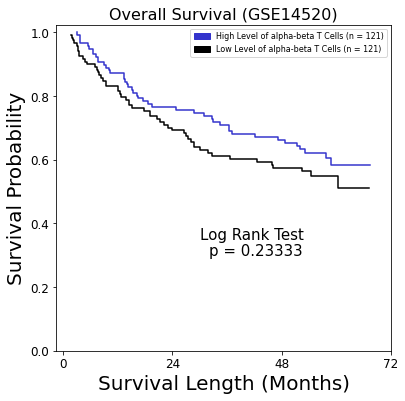

In [24]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,73,24),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of alpha-beta T Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of alpha-beta T Cells (n = %s)'%len(E_low))
plt.text(30,0.35, 'Log Rank Test',fontsize=15)
plt.text(32,0.3, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=8)
plt.title('Overall Survival (GSE14520)',fontsize=16)
plt.savefig('GSE14520.%s.OS.pdf'%selected_cell,format='pdf')

In [25]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

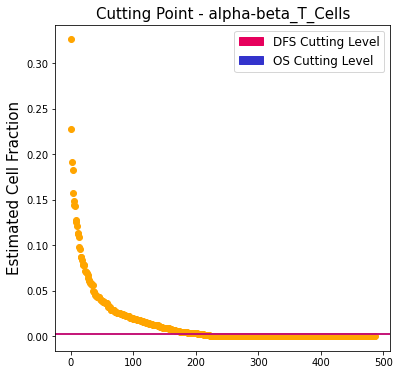

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.title('Cutting Point - %s'%selected_cell,fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')